# EMIT Granule Utility

This notebook demonstrates how to use the AMD Granule class for downloading, loading, and manipulating EMIT products for a given granule.

It is recommended to export the environment variables `EARTHDATA_USERNAME` and `EARTHDATA_PASSWORD` prior to executing this notebook so the earthdata sessions may connect without user input.

This is still a work in progress.

In [ ]:
# Add values here if not already in the environment
import os
os.environ['EARTHDATA_USERNAME'] = 'yourUsername'
os.environ['EARTHDATA_PASSWORD'] = 'yourPassword'

In [1]:
from amd.loaders import Granule

In [2]:
# Sample granules
granules = [
    '001_20220903T163129_2224611_012',
    '001_20230203T184949_2303413_009',
    '001_20231015T215344_2328814_020',
]

The following steps will demonstrate how to download granule data. These steps assume an empty starting directory.

In [3]:
ls

granules.ipynb


In [4]:
# Load the first granule
# `dir` sets the directory to look for existing products for this granule
# `subdir` sets to look under [dir]/[granule], eg. "./granules/001_20220903T163129_2224611_012/"
gran = Granule(granules[0], dir='granules', subdir=True)
gran

<EMIT Granule(001_20220903T163129_2224611_012)

In [5]:
# List of known EMIT products
gran.products

{'RFL': PosixPath('EMIT_L2A_RFL_001_20220903T163129_2224611_012.nc'),
 'RFLUNCERT': PosixPath('EMIT_L2A_RFLUNCERT_001_20220903T163129_2224611_012.nc'),
 'MASK': PosixPath('EMIT_L2A_MASK_001_20220903T163129_2224611_012.nc'),
 'MIN': PosixPath('EMIT_L2B_MIN_001_20220903T163129_2224611_012.nc'),
 'MINUNCERT': PosixPath('EMIT_L2B_MINUNCERT_001_20220903T163129_2224611_012.nc')}

In [6]:
# Source product for each known variable
gran.variableSources

{'reflectance': 'RFL',
 'reflectance_uncertainty': 'RFLUNCERT',
 'mask': 'MASK',
 'band_mask': 'MASK',
 'group_1_band_depth': 'MIN',
 'group_1_mineral_id': 'MIN',
 'group_2_band_depth': 'MIN',
 'group_2_mineral_id': 'MIN',
 'group_1_band_depth_unc': 'MINUNCERT',
 'group_1_fit': 'MINUNCERT',
 'group_2_band_depth_unc': 'MINUNCERT',
 'group_2_fit': 'MINUNCERT'}

In [7]:
# Load a single product. Since this does not exist it will be downloaded.
gran.load('RFL')

Enter your Earthdata Login username:  jamesmo
Enter your Earthdata password:  ········


<xarray.Dataset> Size: 5GB
Dimensions:           (latitude: 2009, longitude: 2353, wavelengths: 285)
Coordinates:
  * wavelengths       (wavelengths) float32 1kB 381.0 388.4 ... 2.493e+03
    fwhm              (wavelengths) float32 1kB ...
    good_wavelengths  (wavelengths) float32 1kB ...
  * latitude          (latitude) float64 16kB -39.31 -39.31 ... -40.4 -40.4
  * longitude         (longitude) float64 19kB -62.51 -62.51 ... -61.24 -61.24
    elev              (latitude, longitude) float32 19MB nan nan nan ... nan nan
    spatial_ref       int64 8B 0
Data variables:
    reflectance       (latitude, longitude, wavelengths) float32 5GB nan ... nan
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-6.25120945e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20220903T163129_22246...
    Orthorectified:                    True

Notice that the `granules` directory is now created and under that a directory for this granule

In [8]:
ls

granules/       granules.ipynb


In [9]:
ls granules

001_20220903T163129_2224611_012/


In [10]:
ls granules/001_20220903T163129_2224611_012

EMIT_L2A_RFL_001_20220903T163129_2224611_012.nc


In [10]:
# Load all products and merge together into a single dataset (this may take a moment to download)
gran.load('all', merge=True)

<xarray.Dataset> Size: 12GB
Dimensions:                  (latitude: 2009, longitude: 2353,
                              wavelengths: 285, mask_bands: 8,
                              packed_wavelength_bands: 36, mineral_name: 294)
Coordinates: (12/14)
  * wavelengths              (wavelengths) float32 1kB 381.0 388.4 ... 2.493e+03
    fwhm                     (wavelengths) float32 1kB 8.415 8.415 ... 8.809
    good_wavelengths         (wavelengths) float32 1kB 1.0 1.0 1.0 ... 1.0 1.0
  * latitude                 (latitude) float64 16kB -39.31 -39.31 ... -40.4
  * longitude                (longitude) float64 19kB -62.51 -62.51 ... -61.24
    elev                     (latitude, longitude) float32 19MB nan nan ... nan
    ...                       ...
    index                    (mineral_name) float64 2kB ...
    record                   (mineral_name) float64 2kB ...
  * mineral_name             (mineral_name) object 2kB 'Plastic_Tarp GDS339 G...
    url                      (mineral_name) object 2kB ...
    group                    (mineral_name) float64 2kB ...
    library                  (mineral_name) object 2kB ...
Dimensions without coordinates: packed_wavelength_bands
Data variables:
    reflectance              (latitude, longitude, wavelengths) float32 5GB n...
    reflectance_uncertainty  (latitude, longitude, wavelengths) float32 5GB n...
    mask                     (latitude, longitude, mask_bands) float32 151MB ...
    band_mask                (latitude, longitude, packed_wavelength_bands) float32 681MB ...
    group_1_band_depth       (latitude, longitude) float32 19MB nan nan ... nan
    group_1_mineral_id       (latitude, longitude) float32 19MB nan nan ... nan
    group_2_band_depth       (latitude, longitude) float32 19MB nan nan ... nan
    group_2_mineral_id       (latitude, longitude) float32 19MB nan nan ... nan
    group_1_band_depth_unc   (latitude, longitude) float32 19MB nan nan ... nan
    group_1_fit              (latitude, longitude) float32 19MB nan nan ... nan
    group_2_band_depth_unc   (latitude, longitude) float32 19MB nan nan ... nan
    group_2_fit              (latitude, longitude) float32 19MB nan nan ... nan
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-6.25120945e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20220903T163129_22246...
    Orthorectified:                    True

Now all the products are available

In [12]:
ls granules/001_20220903T163129_2224611_012

EMIT_L2A_MASK_001_20220903T163129_2224611_012.nc
EMIT_L2A_RFLUNCERT_001_20220903T163129_2224611_012.nc
EMIT_L2A_RFL_001_20220903T163129_2224611_012.nc
EMIT_L2B_MINUNCERT_001_20220903T163129_2224611_012.nc
EMIT_L2B_MIN_001_20220903T163129_2224611_012.nc


In [13]:
# Load a single variable
gran.load('group_1_band_depth_unc')

<xarray.DataArray 'group_1_band_depth_unc' (latitude: 2009, longitude: 2353)> Size: 19MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude     (latitude) float64 16kB -39.31 -39.31 -39.31 ... -40.4 -40.4
  * longitude    (longitude) float64 19kB -62.51 -62.51 -62.51 ... -61.24 -61.24
    elev         (latitude, longitude) float32 19MB nan nan nan ... nan nan nan
    spatial_ref  int64 8B 0
Attributes:
    long_name:  Group 1 Band Depth Uncertainty
    units:      unitless

In [14]:
# Load multiple variables and merge
gran.load(['group_1_fit', 'group_2_fit'], merge=True)

<xarray.Dataset> Size: 57MB
Dimensions:      (latitude: 2009, longitude: 2353)
Coordinates:
  * latitude     (latitude) float64 16kB -39.31 -39.31 -39.31 ... -40.4 -40.4
  * longitude    (longitude) float64 19kB -62.51 -62.51 -62.51 ... -61.24 -61.24
    elev         (latitude, longitude) float32 19MB nan nan nan ... nan nan nan
    spatial_ref  int64 8B 0
Data variables:
    group_1_fit  (latitude, longitude) float32 19MB nan nan nan ... nan nan nan
    group_2_fit  (latitude, longitude) float32 19MB nan nan nan ... nan nan nan
Attributes:
    long_name:  Group 1 Fit
    units:      unitless

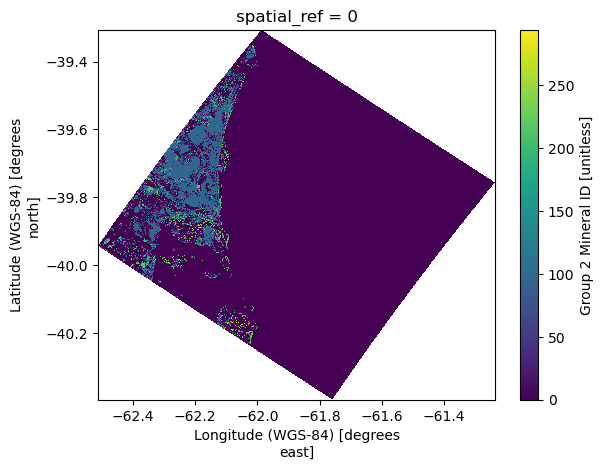

In [11]:
ds = gran.load('MIN')
ds.group_2_mineral_id.plot()

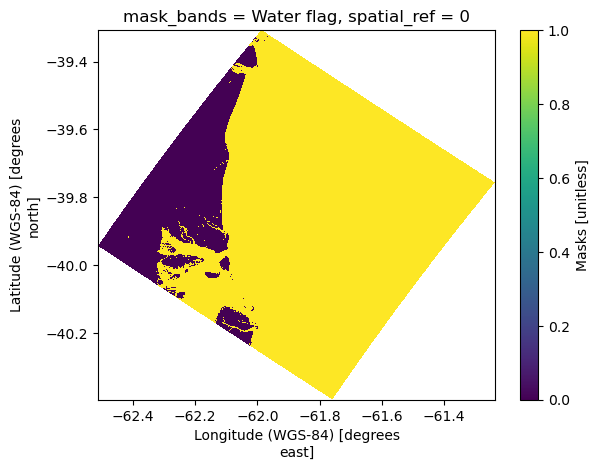

In [34]:
# Same plot, reduced code
gran.load('mask').isel(mask_bands=2).plot()

In [18]:
# Filter on the cloud mask dimension
gran.filterClouds([0, 1, 3])

<xarray.DataArray 'mask' (latitude: 2009, longitude: 2353)> Size: 5MB
array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
  * latitude     (latitude) float64 16kB -39.31 -39.31 -39.31 ... -40.4 -40.4
  * longitude    (longitude) float64 19kB -62.51 -62.51 -62.51 ... -61.24 -61.24
    elev         (latitude, longitude) float32 19MB nan nan nan ... nan nan nan
    spatial_ref  int64 8B 0

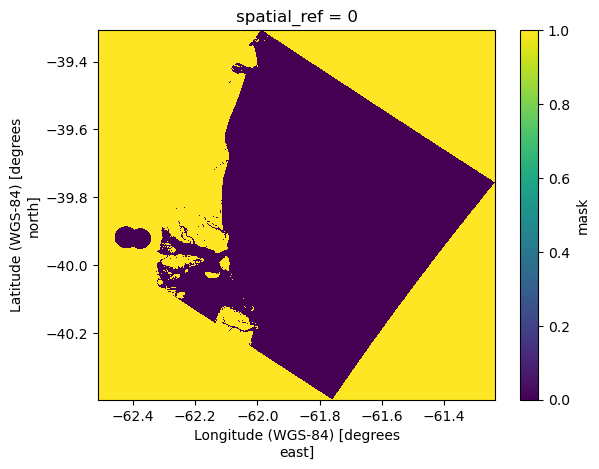

In [18]:
gran.filterClouds([2]).plot()

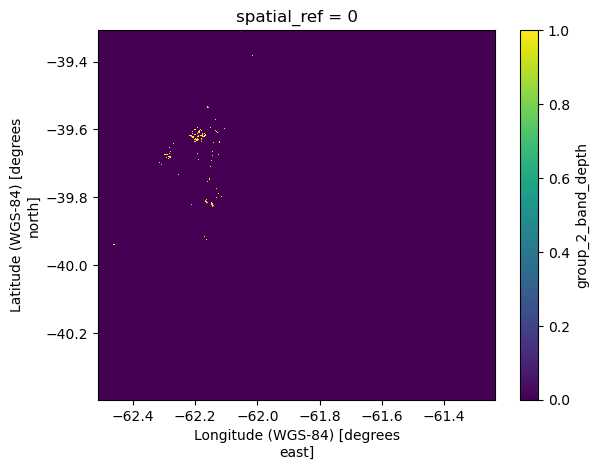

In [24]:
# Filter on any variable using a conditional
# `reset` resets the previously built mask using the cloud filter
gran.filterConditional('group_2_band_depth', '> .15', reset=True).plot()

In [21]:
gran2 = Granule(granules[1], dir='granules', subdir=True)
gran2

<EMIT Granule(001_20230203T184949_2303413_009)

In [22]:
# Downloads missing products automatically
ds = gran2.load(['MIN', 'MINUNCERT'], merge=True)

In [23]:
ls granules/001_20230203T184949_2303413_009

EMIT_L2B_MINUNCERT_001_20230203T184949_2303413_009.nc
EMIT_L2B_MIN_001_20230203T184949_2303413_009.nc


In [24]:
ds

<xarray.Dataset> Size: 170MB
Dimensions:                 (latitude: 1874, longitude: 2514, mineral_name: 294)
Coordinates:
    index                   (mineral_name) float64 2kB ...
    record                  (mineral_name) float64 2kB ...
  * mineral_name            (mineral_name) object 2kB 'Plastic_Tarp GDS339 Gr...
    url                     (mineral_name) object 2kB ...
    group                   (mineral_name) float64 2kB ...
    library                 (mineral_name) object 2kB ...
  * latitude                (latitude) float64 15kB 40.12 40.12 ... 39.1 39.1
  * longitude               (longitude) float64 20kB -107.0 -107.0 ... -105.7
    elev                    (latitude, longitude) float32 19MB nan nan ... nan
    spatial_ref             int64 8B 0
Data variables:
    group_1_band_depth      (latitude, longitude) float32 19MB nan nan ... nan
    group_1_mineral_id      (latitude, longitude) float32 19MB nan nan ... nan
    group_2_band_depth      (latitude, longitude) float32 19MB nan nan ... nan
    group_2_mineral_id      (latitude, longitude) float32 19MB nan nan ... nan
    group_1_band_depth_unc  (latitude, longitude) float32 19MB nan nan ... nan
    group_1_fit             (latitude, longitude) float32 19MB nan nan ... nan
    group_2_band_depth_unc  (latitude, longitude) float32 19MB nan nan ... nan
    group_2_fit             (latitude, longitude) float32 19MB nan nan ... nan
Attributes: (12/39)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.07038602e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2B Estimated Mineral Identificat...
    granule_id:                        EMIT_L2B_MIN_001_20230203T184949_23034...
    Orthorectified:                    True

In [1]:
from amd import AMD
from amd.loaders import Granule

In [5]:
ls granules/

001_20220903T163129_2224611_012/


In [7]:
# Initialize a loader object
gran = Granule('001_20220903T163129_2224611_012', dir='granules', subdir=True)

# Pass it to the AMD class
amd = AMD(gran)

In [8]:
help(amd.process)

Help on method process in module amd.amd:

process(hashmap, classify, colorize=None, merge=False, save=True, **kwargs) method of amd.amd.AMD instance
    TODO
    
    Parameters
    ----------
    classify : dict
        Variables to process through the classify algorithm in the form of
        {variable: filters}
    colorize : dict, default=None
        Colorize processed variables
    merge : bool, default=False
        Merge processed variables together
    save : bool, default=True
        Save processed variables
    kwargs : dict
        Output parameters passed directly to the `save` function
    
    Returns
    -------
    ...



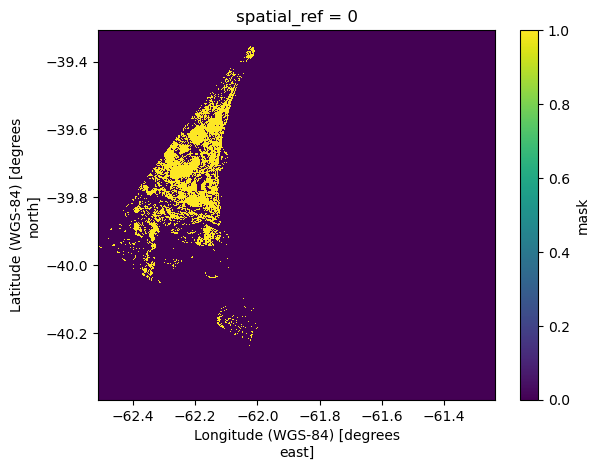

In [10]:
# Create a filter mask
mask = amd.createFilter({'clouds': [0, 1, 3], 'group_2_band_depth': '> .05'})
mask.plot()

In [11]:
# Convert a dict into a mineral hashmap for classifying
hmap = amd.makeHashmap({
    # pyrite
    1: [10],
    # jarosite, schwertmannite, copiapite
    2: [9, 15, 49, 204, 205, 206, 11, 67],
    # Ca,Mg-carbonates
    3: [126, 184, 211, 212, 213, 214, 215, 216, 217, 218, 219, 225, 226, 227, 229, 230, 231, 232]
})
# Colors to assign for each group
colors = {
    #     R,   G,   B,   A
    1: [220,   5,  12, 255],
    2: [247, 240,  87, 255],
    3: [ 25, 101, 176, 255]
}

In [12]:
# Classify using the hashmap
proc = amd.classify('group_2_mineral_id', hashmap=hmap, mask=mask)
proc

<xarray.DataArray 'group_2_mineral_id' (latitude: 2009, longitude: 2353)> Size: 38MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude     (latitude) float64 16kB -39.31 -39.31 -39.31 ... -40.4 -40.4
  * longitude    (longitude) float64 19kB -62.51 -62.51 -62.51 ... -61.24 -61.24
    elev         (latitude, longitude) float32 19MB nan nan nan ... nan nan nan
    spatial_ref  int64 8B 0

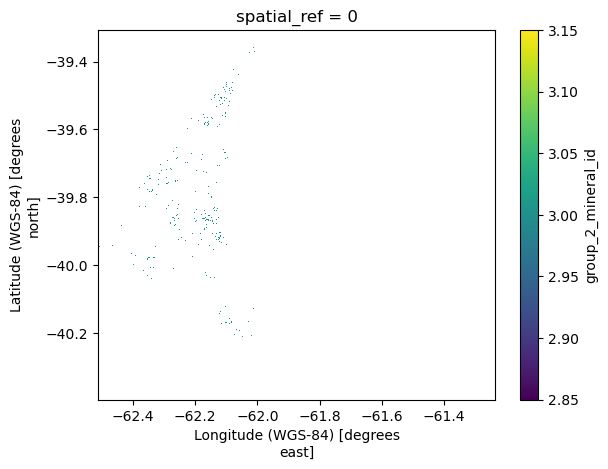

In [13]:
proc.plot()

In [14]:
# Color the classes
clrs = amd.colorize(proc, colors)
clrs

/Users/jamesmo/projects/mambaforge/envs/amd/lib/python3.10/site-packages/xarray/core/duck_array_ops.py:215: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


<xarray.DataArray 'group_2_mineral_id' (band: 4, latitude: 2009, longitude: 2353)> Size: 19MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * latitude     (latitude) float64 16kB -39.31 -39.31 -39.31 ... -40.4 -40.4
  * longitude    (longitude) float64 19kB -62.51 -62.51 -62.51 ... -61.24 -61.24
    elev         (latitude, longitude) float32 19MB nan nan nan ... nan nan nan
    spatial_ref  int64 8B 0
  * band         (band) <U1 16B 'R' 'G' 'B' 'A'

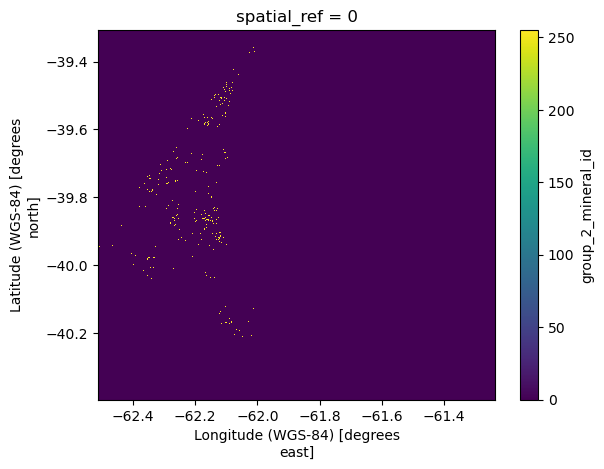

In [15]:
clrs.max('band').plot()